### Clustering
#### KMeans

In [2]:
from sklearn.cluster import KMeans

In [3]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = imread('mf.jpg')

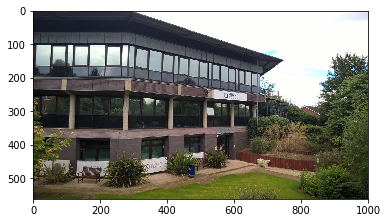

In [7]:
plt.imshow(img)

In [8]:
img = img/255.0

In [10]:
kmeans = KMeans(n_clusters=4)

In [12]:
img.shape

(562, 1000, 3)

In [13]:
kmeans.fit(img.reshape(-1,3))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
img.reshape(-1,3).shape

(562000, 3)

In [15]:
kmeans.cluster_centers_

array([[0.63843153, 0.62480856, 0.59990118],
       [0.15514003, 0.16068125, 0.1385061 ],
       [0.97171934, 0.98215041, 0.97552877],
       [0.37204556, 0.36079495, 0.27532462]])

In [20]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [26]:
new_img = kmeans.cluster_centers_[kmeans.labels_]

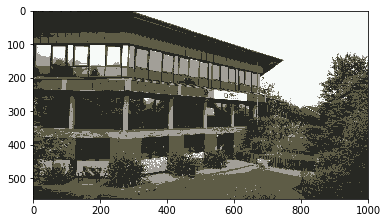

In [27]:
plt.imshow(new_img.reshape(562,1000,3))

### Optimum Clusters

In [28]:
from sklearn.datasets import load_digits

In [29]:
digits = load_digits()

In [30]:
digits.data.shape

(1797, 64)

In [41]:
scores = []
models = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(digits.data)
    models.append(kmeans)
    scores.append(-1 * kmeans.score(digits.data))

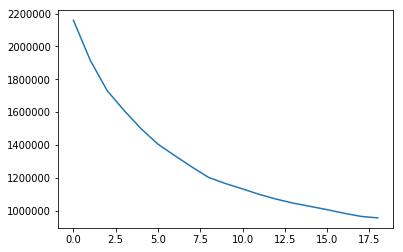

In [40]:
plt.plot(scores)

In [45]:
l = models[9].labels_

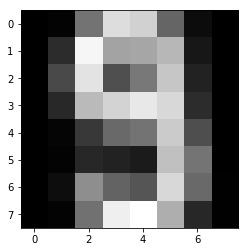

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(models[9].cluster_centers_[0].reshape(8,8),cmap='gray')

In [53]:
from sklearn.cluster import MeanShift

In [54]:
ms = MeanShift(n_jobs=-1)

In [57]:
from sklearn.datasets import make_blobs

In [60]:
X,Y= make_blobs(n_features=2,centers=2,n_samples=1000)

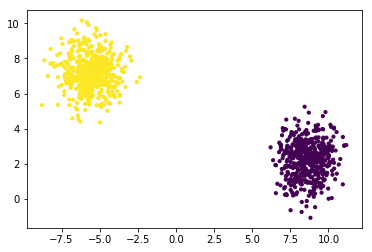

In [63]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)

In [64]:
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=-1, seeds=None)

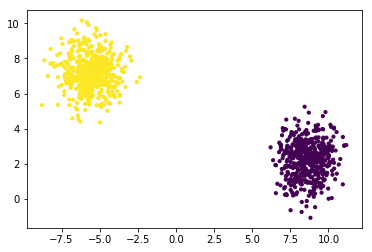

In [66]:
plt.scatter(X[:,0],X[:,1],s=10,c=ms.labels_)